In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CORD-19-research-challenge/COVID.DATA.LIC.AGMT.pdf
/kaggle/input/CORD-19-research-challenge/metadata.readme
/kaggle/input/CORD-19-research-challenge/json_schema.txt
/kaggle/input/CORD-19-research-challenge/metadata.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/What is the incubation period of the virus_.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Incubation period across different age groups.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Proportion of pediatric COVID19 patients who were asymptomatic.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Manifestations of COVID-19 including but not limited to possible cardiomyopathy and cardiac arrest.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/How does viral load relate to disease presentations and likelihood of a po

KeyboardInterrupt: 

In [3]:
df = pd.read_csv("/kaggle/input/CORD-19-research-challenge/metadata.csv")

/tmp/ipykernel_36/2767298967.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/CORD-19-research-challenge/metadata.csv")


In [4]:
df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [8]:
missing = df.isnull().sum()
missing.sort_values(ascending=False)

mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
pdf_json_files       682894
sha                  682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
license                   0
source_x                  0
cord_uid                  0
dtype: int64

In [9]:
df_clean = df.dropna(subset=['abstract', 'publish_time'])
df_nlp = df_clean[['title', 'abstract', 'publish_time', 'authors', 'journal']]

In [10]:
df_nlp = df_nlp.dropna(subset=['title']).reset_index(drop=True)

In [11]:
df_nlp['publish_time'] = pd.to_datetime(df_nlp['publish_time'], errors='coerce')

In [12]:
df_nlp['year'] = df_nlp['publish_time'].dt.year

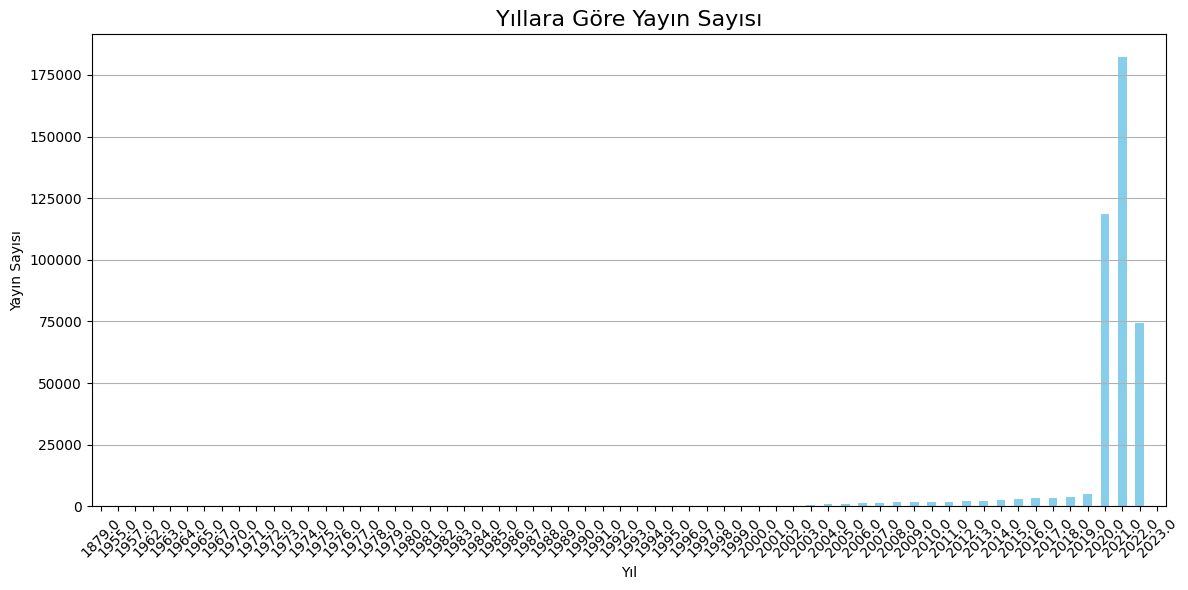

In [13]:
import matplotlib.pyplot as plt

df_nlp['year'] = df_nlp['publish_time'].dt.year
year_counts = df_nlp['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title("Yıllara Göre Yayın Sayısı", fontsize=16)
plt.xlabel("Yıl")
plt.ylabel("Yayın Sayısı")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

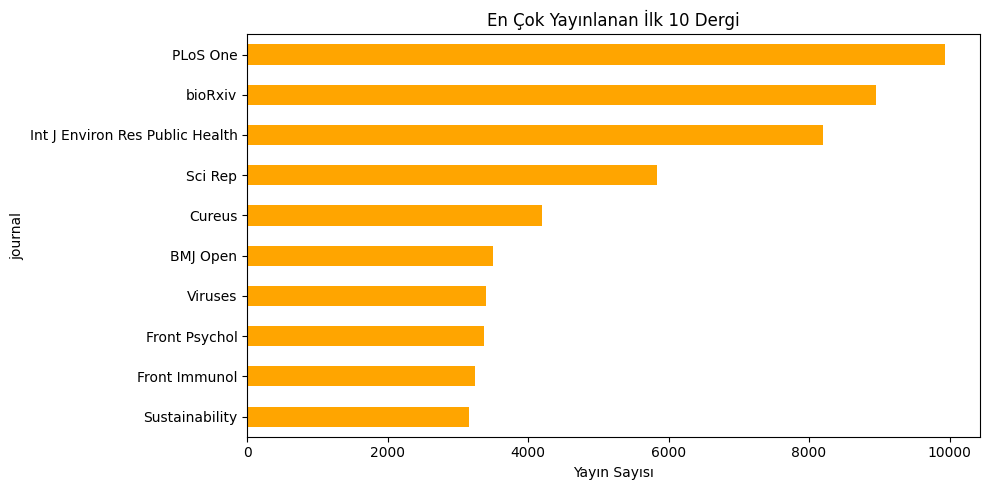

In [14]:
top_journals = df_nlp['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_journals.plot(kind='barh', color='orange')
plt.title("En Çok Yayınlanan İlk 10 Dergi")
plt.xlabel("Yayın Sayısı")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()